In [1]:
#Module Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [8]:
#Data Imports & Subsets
data = pd.read_csv('../data/2021-SxS-Data-and-Data-Info/partial_cleaned_2021.csv')
data= data.drop(columns='Unnamed: 0')

skinny_df = data[['state','math_conf_lvl','fin_sat_lvl','fin_conf_lvl', 'ed_lvl', 'caregiver_ed_lvl', 'hh_ann_inc',
        'bill_difficulty']]

#Create subset with only the 8 states
state_df = skinny_df.query("state in ['Alabama', 'California','District of Columbia','Massachusetts', 'Oregon','Washington','West Virginia', 'Wisconsin']")

In [71]:
state_df["hh_ann_inc"] = pd.Categorical(state_df["hh_ann_inc"], ['<= 15k', '15k-25k', '25k-35k', '35k-50k', '50k-75k', '75k-100k', '100k-150k', '150k-200k', '200k-300k', '>=300k'])
state_df[['ed_lvl','caregiver_ed_lvl']] = pd.Categorical(state_df[['ed_lvl','caregiver_ed_lvl']],['did not complete HS', 'HS Grad', 'GED', 'Some College', 'Associates', 'Bachelors', 'Post Grad', 'declined'] )
state_df["bill_difficulty"] = pd.Categorical(state_df["bill_difficulty"], ['none', 'somewhat', 'very', 'unknown', 'decline'])

/var/folders/t6/vtfks7dd2t9gw7pq2601sfcw0000gn/T/ipykernel_49296/3856081959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_df["hh_ann_inc"] = pd.Categorical(state_df["hh_ann_inc"], ['<= 15k', '15k-25k', '25k-35k', '35k-50k', '50k-75k', '75k-100k', '100k-150k', '150k-200k', '200k-300k', '>=300k'])
/var/folders/t6/vtfks7dd2t9gw7pq2601sfcw0000gn/T/ipykernel_49296/3856081959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_df[['ed_lvl','caregiver_ed_lvl']] = pd.Categorical(state_df[['ed_lvl'

In [72]:
#Creating pivot tables for each feature 
bills_count = state_df.groupby('state')['bill_difficulty'].value_counts().reset_index()
bills_count = bills_count.pivot(index='state', columns='bill_difficulty', values='count')

income_count = state_df.groupby('state')['hh_ann_inc'].value_counts().reset_index()
income_count = income_count.pivot(index='state', columns='hh_ann_inc', values='count')

fin_sat_count = state_df.groupby('state')['fin_sat_lvl'].value_counts().reset_index()
fin_sat_count = fin_sat_count.pivot(index='state', columns='fin_sat_lvl', values='count')
fin_sat_count = fin_sat_count.drop(columns=[98,99])

fin_conf_count = state_df.groupby('state')['fin_conf_lvl'].value_counts().reset_index()
fin_conf_count = fin_conf_count.pivot(index='state', columns='fin_conf_lvl', values='count')
fin_conf_count = fin_conf_count.drop(columns=[98,99])

math_conf_count = state_df.groupby('state')['math_conf_lvl'].value_counts().reset_index()
math_conf_count = math_conf_count.pivot(index='state', columns='math_conf_lvl', values='count')
math_conf_count = math_conf_count.drop(columns=[98,99])

ed_count = state_df.groupby('state')['ed_lvl'].value_counts().reset_index()
ed_count = ed_count.pivot(index='state', columns='ed_lvl', values='count')

cgvr_ed_count = state_df.groupby('state')['caregiver_ed_lvl'].value_counts().reset_index()
cgvr_ed_count = cgvr_ed_count.pivot(index='state', columns='caregiver_ed_lvl', values='count')


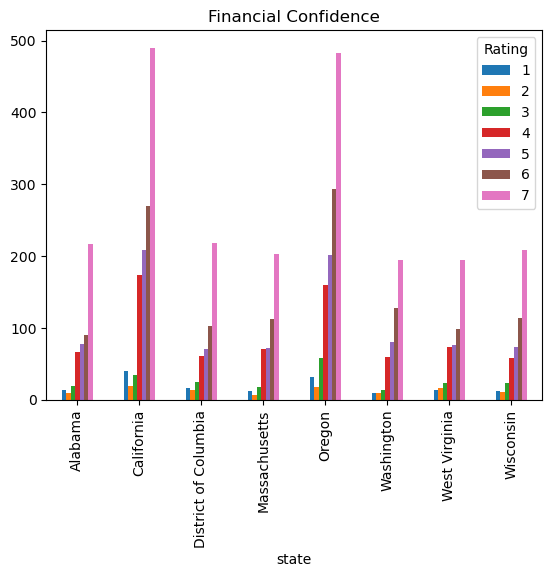

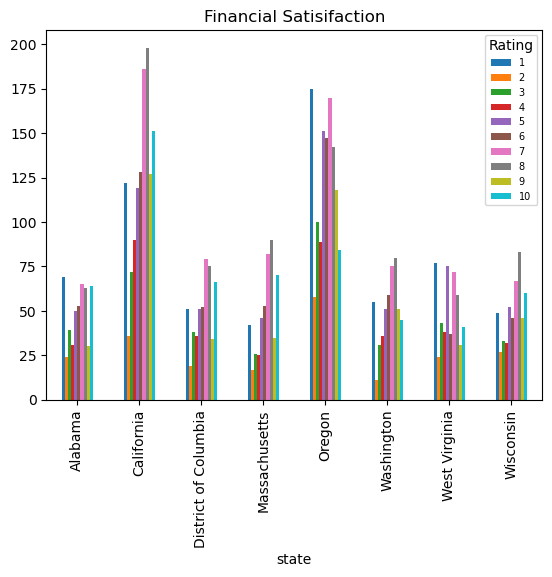

In [73]:
#Fin Confidence & Satisfaction
ax= fin_conf_count.plot(kind='bar')
plt.title('Financial Confidence')
plt.legend(title='Rating')

ax= fin_sat_count.plot(kind='bar')
plt.title('Financial Satisifaction')
plt.legend(title='Rating', prop = {"size": 7})

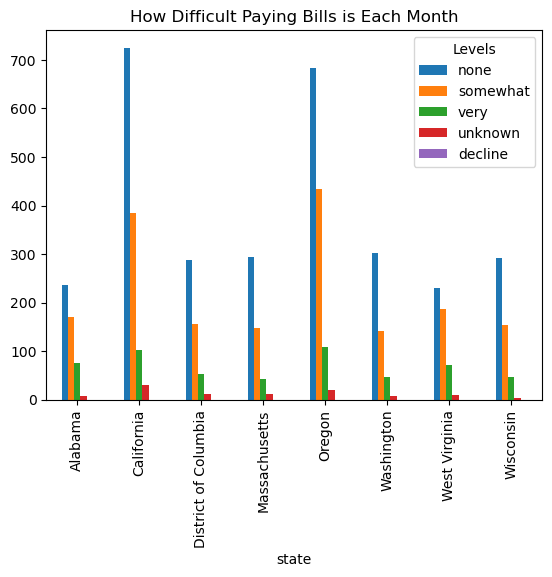

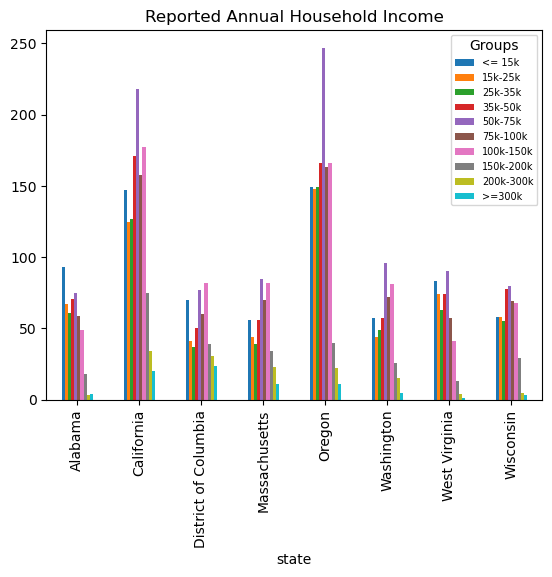

In [74]:
#Bill Difficulty  & Income

ax= bills_count.plot(kind='bar')
plt.title('How Difficult Paying Bills is Each Month')
plt.legend(title='Levels')

ax= income_count.plot(kind='bar')
plt.title('Reported Annual Household Income')
plt.legend(title='Groups', prop = {"size": 7})